In [1]:
# -*- coding:utf-8 -*-
# 网易云音乐 通过歌手ID，生成该歌手的词云
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree
 
headers = {
       'Referer'  :'http://music.163.com',
       'Host'     :'music.163.com',
       'Accept'   :'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
       'User-Agent':'Chrome/10'
    }

In [2]:
# 得到某一首歌的歌词
def get_song_lyric(headers,lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
       lyric = res.json()['lrc']['lyric']
       new_lyric = re.sub(r'[\d:.[\]]','',lyric)
       return new_lyric
    else:
       return ''
       print(res.json())

In [3]:
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
    for stop_word in stop_words:
       f = f.replace(stop_word, '')
    return f

In [4]:

# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f, cut_all=False, HMM=True))
    
    # 请确保 SimHei.ttf 在指定路径中
    wc = WordCloud(
       font_path="C:/Windows/Fonts/simhei.ttf",  # 使用系统中的中文字体 SimHei.ttf
       max_words=100,
       width=2000,
       height=1200,
    )
    
    print(cut_text)
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [5]:
# 得到指定歌手页面 热门前50的歌曲ID，歌曲名
def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id
    # 获取网页HTML
    res = requests.request('GET', page_url, headers=headers)
    # 用XPath解析 前50首热门歌曲
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)
    # 设置热门歌曲的ID，歌曲名称
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
       song_ids.append(href[9:])
       song_names.append(name)
       print(href, '  ', name)
    return song_ids, song_names

In [6]:
# 设置歌手ID，毛不易为12138269
artist_id = '12138269'
[song_ids, song_names] = get_songs(artist_id)
# 所有歌词
all_word = ''

/song?id=1903149553    无名的人
/song?id=1417849873    一程山路
/song?id=569213220    像我这样的人
/song?id=569200213    消愁
/song?id=1417862046    呓语
/song?id=1953125353    看得最远的地方
/song?id=536099160    不染
/song?id=1411558182    东北民谣
/song?id=569214247    平凡的一天
/song?id=569200212    一荤一素
/song?id=569214250    借
/song?id=569200210    给你给我
/song?id=2619846529    只在今夜
/song?id=569212211    盛夏
/song?id=2053617878    一直很安静 (Live版)
/song?id=569214252    如果有一天我变得很有钱
/song?id=2616675211    冒险精神
/song?id=525278524    无问
/song?id=1951513623    分分钟需要你 (Live)
/song?id=2068042776    我要你 (Live版)
/song?id=1407214788    二零三
/song?id=2626116892    小狗圆舞曲
/song?id=2626117027    留宿一宿
/song?id=2626116896    礼物
/song?id=2626116893    想起他们
/song?id=569212210    想你想你
/song?id=1940770243    遥远的她 (Live)
/song?id=1449782341    入海
/song?id=2626117026    此间别处
/song?id=1860567964    生活在别处的你 Another me
/song?id=2626117025    晚安曲
/song?id=1417856017    小王
/song?id=1953436735    下一站天后 (Live)
/song?id=2626116895    失落成群
/song?id=262

无名的人
一程山路
像我这样的人
消愁
呓语
看得最远的地方
不染
东北民谣
平凡的一天
一荤一素
借
给你给我
只在今夜
盛夏
一直很安静 (Live版)
如果有一天我变得很有钱
冒险精神
无问
分分钟需要你 (Live)
我要你 (Live版)
二零三
小狗圆舞曲
留宿一宿
礼物
想起他们
想你想你
遥远的她 (Live)
入海
此间别处
生活在别处的你 Another me
晚安曲
小王
下一站天后 (Live)
失落成群
爱我到日出
冬日倾斜
别再闹了
南一道街
哎哟
牧马城市 (2018老男孩发布会现场)
胡同
东方之珠 (Live)
芬芳一生
我和我的祖国 (Live)
星语心愿 (Live)
不再犹豫 (Live)
如果要写年
孤独患者 (Live)
最佳损友 (Live)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\97059\AppData\Local\Temp\jieba.cache


旅行家说
根据词频，开始生成词云!


Loading model cost 0.330 seconds.
Prefix dict has been built successfully.


        唐恬 / TIAN   TANG 
       钱雷 / LEI   QIAN 
       钱雷 / LEI   QIAN 
   人     钱雷 / LEI   QIAN 
   吉他     高 飞 / FEI   GAO 
   吉他     付威 / WEI   FU 
   吉他 室     Legend （ 来 真的 · 北京 ）   Studio 
   贝斯     李卓 / ZHUO   LI 
       李宗远 / ZONGYUAN   LI @ Studio   A 
   室     Studio   A   Beijing 
 我 是 这 路上   没 名字 的 人 
 我 没有 新闻   没有 人 评论 
 要 拼尽 所有   换得 普通 的 剧本 
 曲折 辗转   不过 谋生 
 我 是 离开   小镇 上 的 人 
 是 哭 笑 着   吃过饭 的 人 
 是 赶路的人   是 养家 的 人 
 是 城市 背景 的   无声 
 我 不过   想 亲手 触摸 
 弯过 腰 的 每一刻 
 留下 的   湿透 的 脚印   是不是 值得 
 这 哽咽   若 你 也 相同 
 就是 同路 的 朋友 
 致 所有   顶天立地 却   平凡 普通 的 
 无名 的 人 啊   我敬 你 一 杯酒 
 敬 你 的 沉默   和 每 一声 怒吼 
 敬 你 弯着腰   上山 往 高处 走 
 头顶   苍穹   努力 地 生活 
 你 来自 于   南方 的 村落 
 来自 粗糙 的 双手 
 你 站 在   楼宇 的 缝隙   可 你 没有 退缩 
 我 来自 于   北方 的 春天 
 来自 一步 一 回首 
 背后 有   告别 的 路口   温暖 每个 日落 
 当 家乡 入冬   的 时候 
 列车 到 站   以后 
 小时候 的 风   再 吹 过 
 回忆起 单纯   的 快乐 
 在 熟悉 的   街头 
 有人   会 用 所有 的 温柔   喊出 你 的 
 名字 
 离家 的 人 啊   我敬 你 一 杯酒 
 敬 你 的 沉默   和 每 一声 怒吼 
 敬 你 弯着腰   上山 往 高处 走 
 头顶   苍穹   努力 地 生活 
 无名 的 人 啊   我敬 你 一 杯酒 
 敬 

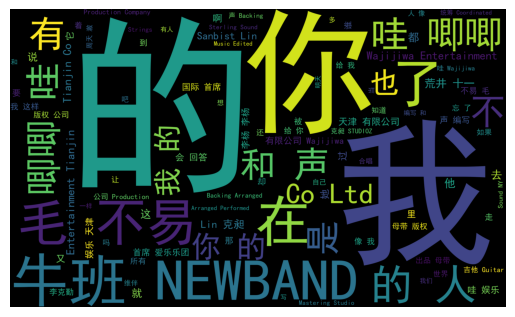

In [7]:
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    print(song_name)
#根据词频 生成词云
create_word_cloud(all_word)